In [1]:
!pip install tensornetwork -q

     |████████████████████████████████| 368kB 8.3MB/s 


In [2]:
%matplotlib inline
import tensorflow as tf
import tensornetwork as tn
import numpy as np
import pylab as pl
from tensornetwork.tn_keras.dense import DenseDecomp
from tensorflow.keras.models import Sequential
import math

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
X, y = make_moons(n_samples=2000, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [5]:
X.shape, y.shape

((2000, 2), (2000,))

In [6]:
X_train.shape, y_train.shape

((1340, 2), (1340, 1))

In [7]:
decomp_model = Sequential()
decomp_model.add(DenseDecomp(128, decomp_size=64, use_bias=True, activation='relu', input_shape=(X_train.shape[1],)))
decomp_model.add(DenseDecomp(64, decomp_size=64, use_bias=True, activation='relu'))
decomp_model.add(DenseDecomp(1, decomp_size=4, use_bias=True, activation='sigmoid'))

In [8]:
decomp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_decomp (DenseDecomp)   (None, 128)               8448      
_________________________________________________________________
dense_decomp_1 (DenseDecomp) (None, 64)                12352     
_________________________________________________________________
dense_decomp_2 (DenseDecomp) (None, 1)                 261       
Total params: 21,061
Trainable params: 21,061
Non-trainable params: 0
_________________________________________________________________


In [9]:
decomp_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [10]:
history = decomp_model.fit(
    x=X_train,
    y=y_train, 
    validation_data=(X_test, y_test), 
    epochs=100, 
    batch_size=128
)

Epoch 1/100
11/11 [==============================] - 5s 73ms/step - loss: 0.6642 - accuracy: 0.6117 - val_loss: 0.5306 - val_accuracy: 0.8470
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.4886 - accuracy: 0.8293 - val_loss: 0.3517 - val_accuracy: 0.8515
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.3397 - accuracy: 0.8445 - val_loss: 0.3212 - val_accuracy: 0.8455
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 0.3046 - accuracy: 0.8627 - val_loss: 0.3207 - val_accuracy: 0.8515
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.3267 - accuracy: 0.8356 - val_loss: 0.3085 - val_accuracy: 0.8545
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 0.3014 - accuracy: 0.8603 - val_loss: 0.3033 - val_accuracy: 0.8530
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 0.3080 - accuracy: 0.8544 - val_loss: 0.3039 - val_accuracy: 0.8545
Epoch 8/100


In [11]:
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

In [12]:
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 50)
    y_vals = np.linspace(min_y, max_y, 50)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    vals = [[XX[i, j], YY[i, j]] for i in range(grid_r) for j in range(grid_c)]
    preds = pred_fun(np.array(vals))
    ZZ = np.reshape(preds, (grid_r, grid_c))
    print(np.min(preds), np.min(ZZ))
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    CS = pl.contour(XX, YY, ZZ, 100, levels = [0.1*i for i in range(1,10)])
    pl.clabel(CS, inline=1, fontsize=10)
    pl.xlabel("x")
    pl.ylabel("y")

def gen_pred_fun(clf):
    def pred_fun(X):
        return clf.predict(X)[:, 0]
    return pred_fun

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


5.283537e-13 5.283537e-13


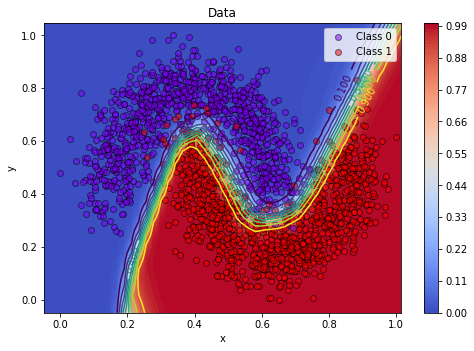

In [13]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(decomp_model))
plot_data(X, y)